# Computer Assignment 0
Farzad Habibi - 
__810195383__


## Introduction 
Goal of this project is getting more familiar with python libraries for data science. They including `numpy`, `pandas`, and etc.
At the end of this project we got familiar with a simple Linear Regression. 


## A. Loading Data and Get Familier with it
For loading data we use pandas built in `read_csv` function to load a csv file into a data frame. Data frame is a pandas data structure which is like table. It includes some rows with some columns. These rows and columns can also have indexes. 

In [0]:
import pandas as pd
import os

In above code block we import pandas with `pd` name. This name is more easier to call, because we want to use it a lot!

In [0]:
TRAIN_SET_DIRECTORY  = '.'
TRAIN_SET_NAME = 'houses.csv'
train_set = pd.read_csv(os.path.join(TRAIN_SET_DIRECTORY, TRAIN_SET_NAME),
                        index_col='Id')

After loading `df` we can show some head of datas with `head` method. This method also can get number of row to show as attribute.

In [5]:
train_set.head(n=5)

,MSSubClass,LotArea,LotConfig,OverallQual,LotFrontage,Neighborhood,OverallCond,BedroomAbvGr,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,SalePrice
Id,,,,,,,,,,,,
1,60,8450,Inside,7,65.0,CollgCr,5,3,8,856,2003,208.5
2,20,9600,FR2,6,80.0,Veenker,8,3,6,1262,1976,181.5
3,60,11250,Inside,7,68.0,CollgCr,5,3,6,920,2001,223.5
4,70,9550,Corner,7,60.0,Crawfor,5,3,7,756,1915,140.0
5,60,14260,FR2,8,84.0,NoRidge,5,4,9,1145,2000,250.0


We can also see our `df` informations with `describe` method. This method show some useful information like `count`, `mean`, `min`, `std` (sample standard devation), and etc for every column in data frame.

In [6]:
train_set.describe()

,MSSubClass,LotArea,OverallQual,LotFrontage,OverallCond,BedroomAbvGr,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,SalePrice
count,1134.000000,1134.000000,1134.000000,937.00000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000
mean,54.056437,9487.280423,6.065256,68.40555,5.551146,2.828924,6.354497,1032.037037,1972.981481,174.783949
std,38.760477,3866.279692,1.294012,20.13204,1.015560,0.734241,1.441257,385.301916,28.432646,65.428985
min,20.000000,1300.000000,2.000000,21.00000,3.000000,1.000000,3.000000,0.000000,1885.000000,34.900000
25%,20.000000,7508.750000,5.000000,59.00000,5.000000,2.000000,5.000000,796.000000,1955.000000,129.925000
50%,50.000000,9246.500000,6.000000,70.00000,5.000000,3.000000,6.000000,990.000000,1975.000000,161.875000
75%,60.000000,11250.000000,7.000000,80.00000,6.000000,3.000000,7.000000,1262.000000,2001.000000,207.500000
max,180.000000,39104.000000,10.000000,134.00000,8.000000,5.000000,11.000000,2223.000000,2009.000000,415.298000


In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1134 entries, 1 to 1243
Data columns (total 12 columns):
MSSubClass      1134 non-null int64
LotArea         1134 non-null int64
LotConfig       1134 non-null object
OverallQual     1134 non-null int64
LotFrontage     937 non-null float64
Neighborhood    1134 non-null object
OverallCond     1134 non-null int64
BedroomAbvGr    1134 non-null int64
TotRmsAbvGrd    1134 non-null int64
TotalBsmtSF     1134 non-null int64
YearBuilt       1134 non-null int64
SalePrice       1134 non-null float64
dtypes: float64(2), int64(8), object(2)
memory usage: 115.2+ KB


### Droping Categorical Features
In this project we should not use categorical columns and it is more easeir to use just number columns; therefore, we will **drop** categorical columns. 

In [0]:
train_set.drop(train_set.select_dtypes(['object']).columns, inplace=True, axis=1)

In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1134 entries, 1 to 1243
Data columns (total 10 columns):
MSSubClass      1134 non-null int64
LotArea         1134 non-null int64
OverallQual     1134 non-null int64
LotFrontage     937 non-null float64
OverallCond     1134 non-null int64
BedroomAbvGr    1134 non-null int64
TotRmsAbvGrd    1134 non-null int64
TotalBsmtSF     1134 non-null int64
YearBuilt       1134 non-null int64
SalePrice       1134 non-null float64
dtypes: float64(2), int64(8)
memory usage: 97.5 KB


As you see we dropped object columns. In drop function we use axis = 1 which means using list as column index.

### Imputing Missing Values. 
as you see `LotFrontage` column have some null values. We should fill these null values with their mean values. In project description mentioned to fill all null values with column mean; Hence, we call `fillna` method on all of `dataframe`.

In [0]:
train_set.fillna(train_set.mean(), inplace=True)

In [11]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1134 entries, 1 to 1243
Data columns (total 10 columns):
MSSubClass      1134 non-null int64
LotArea         1134 non-null int64
OverallQual     1134 non-null int64
LotFrontage     1134 non-null float64
OverallCond     1134 non-null int64
BedroomAbvGr    1134 non-null int64
TotRmsAbvGrd    1134 non-null int64
TotalBsmtSF     1134 non-null int64
YearBuilt       1134 non-null int64
SalePrice       1134 non-null float64
dtypes: float64(2), int64(8)
memory usage: 97.5 KB


As you see all of columns have none null values. 

### Visualizing DataFrame
First of all we import `matplotlib` to plot data in dataframe.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
#Becasue we use jupyter and want to show plots inline

In [0]:
def scatter(df, y_col='SalePrice', nrows=3, ncols=4):
  ploting_cols = df.columns[df.columns != 'SalePrice']
  plt.figure(figsize=(ncols*5, nrows*5))
  for index, col in enumerate(ploting_cols, start=1):
    plt.subplot(nrows, ncols, index)
    plt.scatter(x=df[col], y=df[y_col])
    plt.xlabel(col)

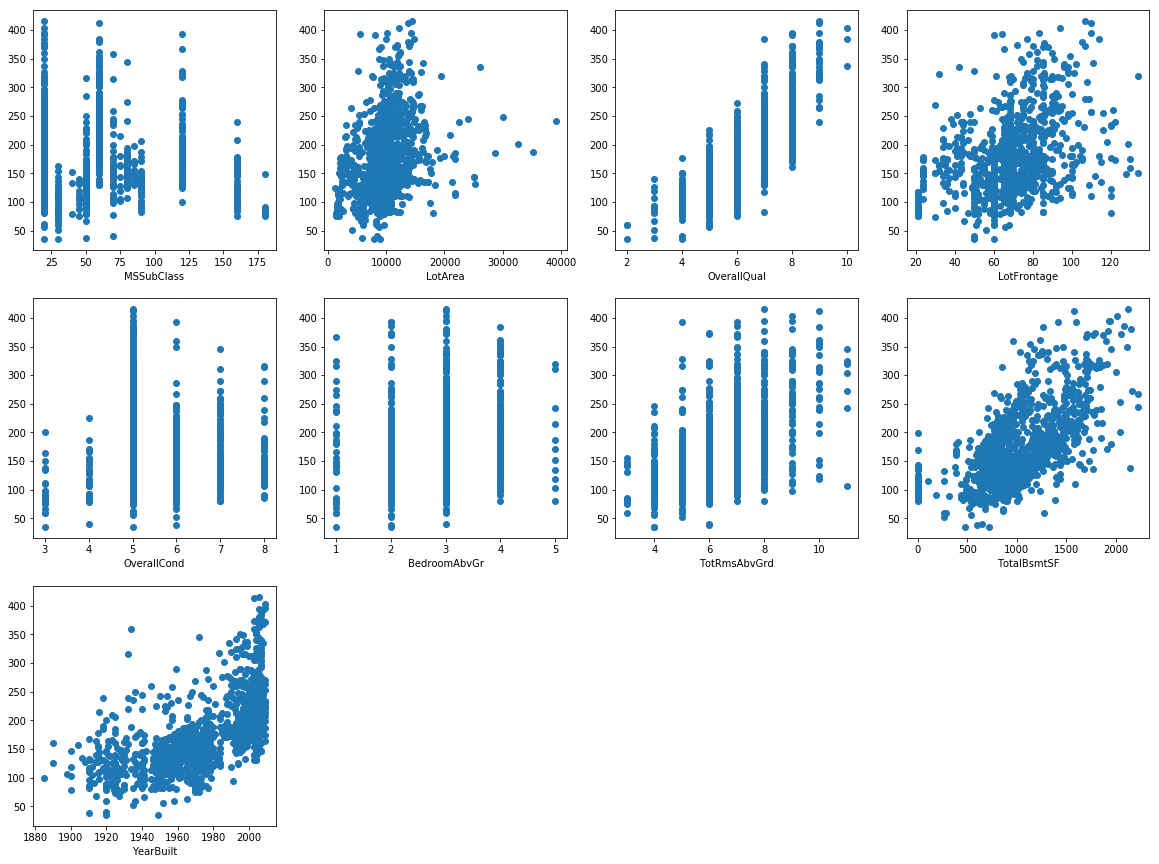

In [14]:
scatter(train_set)

##  B. Linear Regressor
We should first select most linear feature with `SalePrice`; therefore we use correlation matrix. If a feature has a correlation near 1 or -1 it is more linear than others, so we select features with max correlation relative to `SalePrice`.

In [15]:
train_set.corr()['SalePrice'].sort_values()

OverallCond    -0.130668
MSSubClass     -0.022218
BedroomAbvGr    0.211663
LotArea         0.333773
LotFrontage     0.370614
TotRmsAbvGrd    0.547610
YearBuilt       0.610557
TotalBsmtSF     0.617730
OverallQual     0.807843
SalePrice       1.000000
Name: SalePrice, dtype: float64

From above correlations we recognize that `OverallQual` has a correlation near 1 and we can select it as most linear feature relative to `SalePrice`.

Let declare RMSE function which compute RMSE from prediction and actuall price. We do not use numpy functionalities because it will be used in next sections!

In [0]:
import math
def rmse(y_pred, y_true):
  n = len(y_pred)
  sum = 0
  for i in range(n):
     sum += pow(y_pred[i] - y_true[i], 2)
  sum = sum / n
  return math.sqrt(sum)

Then we try to anticipate good coefficients for our regressetion in $y_{pred} = wx + b$  formula. 

In [0]:
def predict(w, b, x):
  return [w*i + b for i in x]

I just see OverallQual plot and try to anticipate line slope which is 32. I also putted b to 0. becasue line strared from the origin of plot.

So we can say in our model : **$w=32, b=0$**

In [18]:
y_pred = predict(32, 0, train_set['OverallQual'])
print(f"RMSE is {rmse(y_pred, list(train_set['SalePrice'].values))}")

RMSE is 44.60313108533437


After seeing that rmse is less than **90** we try to plot predictions and also our regression line on input data.

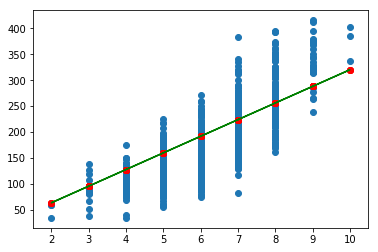

In [19]:
plt.scatter(train_set['OverallQual'], y=train_set['SalePrice'])
plt.scatter(train_set['OverallQual'], y=y_pred, c='r')
plt.plot(train_set['OverallQual'], y_pred, c='g')
plt.show()

## D. Changing B to numpy!

In [0]:
import numpy as np

In [0]:
def new_predict(w, b, x):
  return w*x + b

In [0]:
def new_rmse(y_pred, y_true):
  return math.sqrt(np.sum(np.power((y_pred - y_true), 2)) * 1/len(y_pred))

In [23]:
y_pred = new_predict(32, 0, train_set['OverallQual'].values)
print(f"RMSE is {new_rmse(y_pred, train_set['SalePrice'].values)}")

RMSE is 44.603131085334354


## E. K-nearest-neighbors

### Init

In [0]:
class Knearest():
  def __init__(self, train_data, k=10, target='SalePrice'):
    self.k = k;
    self.y_train = train_data[target]
    self.x_train = train_data.drop([target], axis=1)
    self.mins = self.x_train.min()
    self.maxs = self.x_train.max()

  def std(self, to_std):
    return (to_std - self.mins) / (self.maxs - self.mins)

  def __call__(self, to_pred):
    x_train_std = self.std(self.x_train)
    to_pred_std = self.std(to_pred)
    x_train_std['Distance'] = np.sqrt(
        np.sum(np.power(x_train_std - to_pred_std.values, 2),axis=1))
    smallest = x_train_std.nsmallest(self.k, ['Distance']).index
    return np.mean(self.y_train[smallest].values)

At this class :

* We used std function to standarized inputs like our train data and to prediction values. 
* In __\_\_call\_\___ method :
  * At first we standarized data
  * Then compute distances, for all rows of train data.
  * After that we sellect k samllest distance Ids. 
  * And at the end we return mean of sale price for that ids.

This calsss used Euclidean distance and assumes that it inputs is a dataframe with one row. 

### Test
We can **test** our class with training our model on 900 entries of train set and compute rmse for 200 more entries with predicting their Sale Price.

In [0]:
k_nearest = Knearest(train_set)

In [40]:
y_pred = train_set[0:200].apply(lambda x: k_nearest(pd.DataFrame([x])
                                        .drop(['SalePrice'], axis=1)), axis=1)
y_true = train_set[0:200]['SalePrice']

SyntaxError: ignored

In [27]:
print(f"RMSE is {new_rmse(y_pred, y_true.values)}")

RMSE is 30.86729253351434


As you see it has a better RMSE than linear regression.

In [28]:
Knearest(train_set.iloc[np.r_[0:1, 1:len(train_set)]])

### Visualize 
We also find this prediction for all train_set with training on train_set except to predict value each time .

In [0]:
y_pred = train_set.reset_index().apply(lambda x: Knearest(
    train_set.drop(x['Id']))(
    pd.DataFrame([x]).drop(['SalePrice', 'Id'], axis=1)), axis=1)

In above function, first we apply a lambda function on all rows which it make a new Knearest object in every itteration and train on all datas except that one (Becasue we want to predict it's value!). Then try to predict that row. 

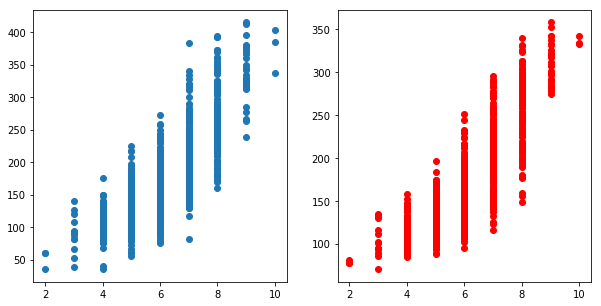

In [30]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(train_set['OverallQual'], y=train_set['SalePrice'])
plt.subplot(1, 2, 2)
plt.scatter(train_set['OverallQual'], y=y_pred, c='r')
plt.show()